# Problem 7: Phase transitions in compressed sensing

Prof: Veniamin Morgenshtern

Solver: Andy Regensky

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import cvxpy as cp

In [10]:
def basisPursuit(A,b):
    x = cp.Variable(A.shape[1])
    objective = cp.Minimize(cp.norm(x,1))
    constraints = [A*x == b]
    cp.Problem(objective, constraints).solve()
    return x.value

# Full signal length
n = 500

# Define grid
deltas = np.linspace(0.05,1,20)
rhos = np.linspace(0.05,1,20)
runs = 10

# Run test. This will take a while. Expect 30+ minutes on a moderately fast machine. (Remember, we're solving 4000
# convex optimization problems here)
Failure_matrix = np.zeros((rhos.shape[0],deltas.shape[0]))
for idx_delta, delta in enumerate(deltas):
    m = int(delta*n)
    for idx_rho, rho in enumerate(rhos):
        s = int(rho*m)
        fails = 0
        for _ in range(runs):
            x0 = np.zeros(n)
            x0[np.random.permutation(n)[:s]] = np.random.randn(s)
            A = (1./m)*np.random.randn(m,n)
            b = A.dot(x0)
            x_hat = basisPursuit(A,b)
            error = np.linalg.norm(x_hat-x0,2)/np.linalg.norm(x0,2)
            if (error > 1e-9):
                fails += 1
        Failure_matrix[idx_rho, idx_delta] = fails
        
print(Failure_matrix)

[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 3.  5.  2.  2.  0.  1.  3.  0.  1.  2.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 9.  8.  7.  3.  2.  2.  4.  2.  2.  1.  2.  1.  1.  1.  0.  0.  1.  0.
   0.  0.]
 [10.  8.  9.  7.  8.  2.  3.  6.  3.  4.  4.  4.  2.  2.  0.  1.  1.  0.
   0.  0.]
 [10. 10. 10. 10.  9.  9.  8.  5.  6.  6.  6.  3.  1.  1.  2.  1.  1.  0.
   1.  0.]
 [10. 10. 10. 10. 10. 10. 10.  9.  9.  7.  7.  5.  0.  3.  3.  3.  1.  2.
   3.  0.]
 [10. 10. 10. 10. 10. 10. 10. 10. 10. 10.  6.  8.  7.  3.  4.  3.  3.  3.
   4.  0.]
 [10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10.  8.  6.  5.  6.  3.  4.  4.
   5.  0.]
 [10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10.  8.  7.  4.  7.
   3.  0.]
 [10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10.  9.  4.  7.  4.
   6.  0.]
 [10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10.

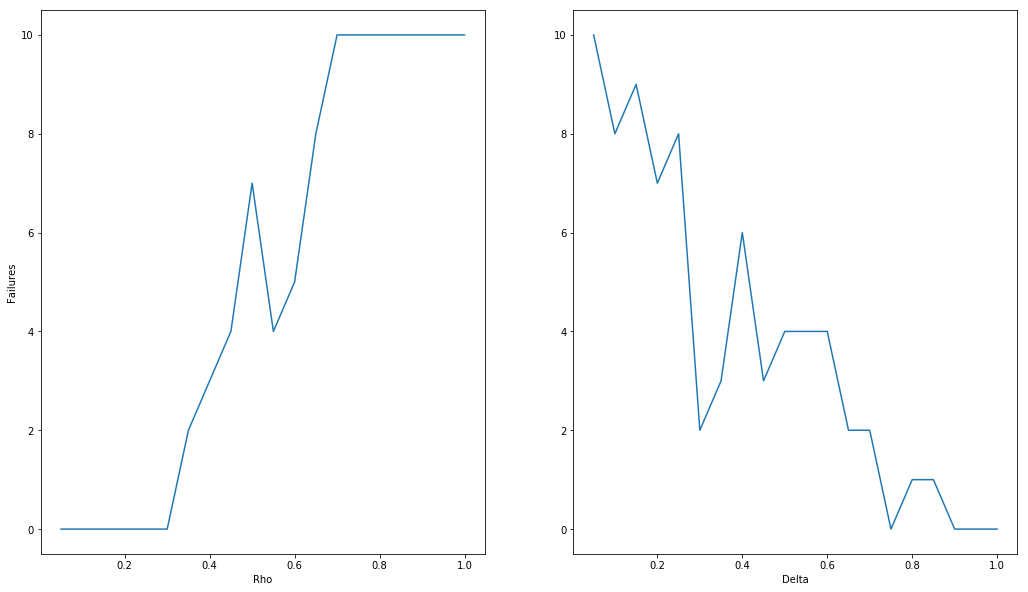

In [13]:
# Plot failures over rho for delta[17]
plt.figure(figsize=(17.5,10))
plt.subplot(1,2,1)
plt.plot(rhos, Failure_matrix[:,17])
plt.xlabel('Rho')
plt.ylabel('Failures')

# Plot failures over delta for rho[4]
plt.subplot(1,2,2)
plt.plot(deltas, Failure_matrix[4,:])
plt.xlabel('Delta')
plt.show()